### LOAN DATASET (CLASSIFICATION PROBLEM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score,precision_recall_curve

In [2]:
df=pd.read_csv(r'C:\Users\manis\Downloads\Loans - Training Set.csv')

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [7]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [8]:
df['Tax Liens'].value_counts()

0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
8.0          2
11.0         2
15.0         1
10.0         1
Name: Tax Liens, dtype: int64

In [9]:
df['Bankruptcies'].value_counts()

0.0    98650
1.0    11613
2.0      468
3.0      110
4.0       27
5.0        8
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [10]:
df["Loan Status"].value_counts()

Fully Paid     85934
Charged Off    25173
Name: Loan Status, dtype: int64

In [11]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


In [12]:
df0=df[df["Loan Status"]=='Fully Paid']
df1=df[df["Loan Status"]=='Charged Off']

In [13]:
df.shape

(111107, 19)

In [14]:
df0.shape

(85934, 19)

In [15]:
df1.shape

(25173, 19)

In [16]:
df0['Months since last delinquent']=df0['Months since last delinquent'].fillna(df0['Months since last delinquent'].median())
df1['Months since last delinquent']=df1['Months since last delinquent'].fillna(df1['Months since last delinquent'].median())

In [17]:
df0['Years in current job']=df0['Years in current job'].fillna(df0['Years in current job'].mode()[0])
df1['Years in current job']=df1['Years in current job'].fillna(df1['Years in current job'].mode()[0])

In [18]:
df0['Annual Income']=df0['Annual Income'].fillna(df0['Annual Income'].mean())
df1['Annual Income']=df1['Annual Income'].fillna(df1['Annual Income'].mean())

In [19]:
df0['Tax Liens']=df0['Tax Liens'].fillna(df0['Tax Liens'].mode()[0])
df1['Tax Liens']=df1['Tax Liens'].fillna(df1['Tax Liens'].mode()[0])

In [20]:
df0['Tax Liens'].mode()

0    0.0
Name: Tax Liens, dtype: float64

In [21]:
df0['Tax Liens'].mode()[0]

0.0

In [22]:
df0['Bankruptcies']=df0['Bankruptcies'].fillna(df0['Bankruptcies'].mode()[0])
df1['Bankruptcies']=df1['Bankruptcies'].fillna(df1['Bankruptcies'].mode()[0])

In [23]:
df_new=pd.concat([df0,df1])
df_new.shape

(111107, 19)

In [24]:
df_new = df_new.sort_index()

In [25]:
df_new.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [26]:
df['Credit Score'].value_counts()

747.0     2040
740.0     1954
746.0     1932
741.0     1922
742.0     1911
          ... 
5960.0       1
5860.0       1
5880.0       1
5900.0       1
6000.0       1
Name: Credit Score, Length: 326, dtype: int64

In [27]:
df_new['Credit Score']=df_new['Credit Score'].fillna(df_new['Credit Score'].mean())

In [28]:
df_new.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [29]:
a=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

In [30]:
for i in range (0,11):
    df_new['Years in current job'].replace(a[i],i,inplace=True)

In [31]:
df_new.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,0,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,31.0,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3,Rent,34171.0,Debt Consolidation,990.94,10.0,31.0,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  float64
 6   Years in current job          111107 non-null  int64  
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [33]:
for i in range (111107):
    if '$' in str(df_new['Monthly Debt'][i]):
        df_new['Monthly Debt'][i]=float(df_new['Monthly Debt'][i][1:])

In [34]:
df_new['Monthly Debt']=df_new['Monthly Debt'].astype('float')

In [35]:
for i in range (111107):
    if '#VALUE!' in str(df_new['Maximum Open Credit'][i]):
        df_new['Maximum Open Credit'][i]=0

In [36]:
df_new['Maximum Open Credit']=df_new['Maximum Open Credit'].astype('int')

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  float64
 6   Years in current job          111107 non-null  int64  
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  float64
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X = df_new[['Bankruptcies', 'Tax Liens']]

In [40]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [41]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [42]:
print(vif_data)

        feature      VIF
0  Bankruptcies  1.00661
1     Tax Liens  1.00661


In [43]:
for i in range (111107):
    if 'HaveMortgage' in (df_new['Home Ownership'][i]):
        df_new['Home Ownership'][i]=df_new['Home Ownership'][i].replace('HaveMortgage','Home Mortgage')

In [44]:
df_new["Home Ownership"].value_counts()

Home Mortgage    54051
Rent             46868
Own Home         10188
Name: Home Ownership, dtype: int64

In [45]:
df_new['Term'].value_counts()

Short Term    80274
Long Term     30833
Name: Term, dtype: int64

In [46]:
df_new['Loan Status'] = df_new['Loan Status'].map({'Charged Off':0, 'Fully Paid':1})

In [47]:
df_new['Term']=np.where(df_new['Term']=='Long Term',1,0)

In [48]:
df_new['Term'].value_counts()

0    80274
1    30833
Name: Term, dtype: int64

In [49]:
df_new['Maximum Open Credit'].value_counts()

0        754
10782     14
7411      13
7412      13
11188     13
        ... 
67411      1
9107       1
57798      1
5737       1
53374      1
Name: Maximum Open Credit, Length: 46624, dtype: int64

In [50]:
for i in range(111107):
    if 'Other' in (df_new['Purpose'][i]):
        df_new['Purpose'][i]=df_new['Purpose'][i].replace("Other","other")

In [51]:
df_new['Home Ownership'].value_counts()

Home Mortgage    54051
Rent             46868
Own Home         10188
Name: Home Ownership, dtype: int64

In [52]:
df_new1=df_new.drop(columns=['Loan ID','Customer ID'])

In [53]:
df_new['Term'].value_counts()

0    80274
1    30833
Name: Term, dtype: int64

In [54]:
xd=pd.get_dummies(df_new1,columns=['Home Ownership','Purpose'])

In [55]:
xd

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,12232,0,7280.0,0,46643.0,777.39,18.0,10.0,12,...,0,0,0,0,0,0,0,0,0,0
1,0,25014,1,7330.0,10,81099.0,892.09,26.7,31.0,14,...,0,0,0,0,0,0,0,0,0,0
2,0,16117,0,7240.0,9,60438.0,1244.02,16.7,32.0,11,...,1,0,0,0,0,0,0,0,0,0
3,0,11716,0,7400.0,3,34171.0,990.94,10.0,31.0,21,...,0,0,0,0,0,0,0,0,0,0
4,0,9789,1,6860.0,10,47003.0,503.71,16.7,25.0,13,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,1,15654,1,686.0,10,43050.0,889.69,14.1,49.0,18,...,0,0,0,0,0,0,0,0,0,0
111103,1,15237,0,706.0,10,60948.0,700.90,15.9,48.0,11,...,0,0,0,0,0,0,0,0,0,0
111104,1,10413,0,719.0,5,66945.0,1210.59,8.7,32.0,11,...,0,0,0,0,0,0,0,0,0,0
111105,1,34447,0,626.0,10,78736.0,1476.30,30.4,9.0,12,...,0,0,0,0,0,0,0,0,0,0


In [56]:
xd['Term']=np.where(xd['Term']=='Long Term',1,0)

In [57]:
xd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111107 entries, 0 to 111106
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   111107 non-null  int64  
 1   Current Loan Amount           111107 non-null  int64  
 2   Term                          111107 non-null  int32  
 3   Credit Score                  111107 non-null  float64
 4   Years in current job          111107 non-null  int64  
 5   Annual Income                 111107 non-null  float64
 6   Monthly Debt                  111107 non-null  float64
 7   Years of Credit History       111107 non-null  float64
 8   Months since last delinquent  111107 non-null  float64
 9   Number of Open Accounts       111107 non-null  int64  
 10  Number of Credit Problems     111107 non-null  int64  
 11  Current Credit Balance        111107 non-null  int64  
 12  Maximum Open Credit           111107 non-nul

In [58]:
X=xd.drop(columns='Loan Status')

In [59]:
X.head(2)

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232,0,7280.0,0,46643.0,777.39,18.0,10.0,12,0,...,0,0,0,0,0,0,0,0,0,0
1,25014,0,7330.0,10,81099.0,892.09,26.7,31.0,14,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df['Term'].value_counts()

Short Term    80274
Long Term     30833
Name: Term, dtype: int64

In [61]:
y=xd['Loan Status']

In [62]:
y

0         0
1         0
2         0
3         0
4         0
         ..
111102    1
111103    1
111104    1
111105    1
111106    1
Name: Loan Status, Length: 111107, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score,precision_recall_curve

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=199)

In [65]:
X_train.shape

(83330, 32)

In [100]:
y_test.value_counts()

1    21395
0     6382
Name: Loan Status, dtype: int64

In [97]:
y_train.value_counts()

1    64539
0    18791
Name: Loan Status, dtype: int64

In [66]:
y_train.shape

(83330,)

In [67]:
lr=LogisticRegression()

In [68]:
lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred=lr.predict(X_train)

In [70]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
acc=accuracy_score(y_train,y_pred)

In [72]:
acc

0.8199207968318732

In [73]:
print("F1 :",f1_score(y_train, y_pred)*100)

F1 : 89.57699520733485


In [74]:
y_test_pred=lr.predict(X_test)

In [75]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.20      0.34     18791
           1       0.81      1.00      0.90     64539

    accuracy                           0.82     83330
   macro avg       0.90      0.60      0.62     83330
weighted avg       0.85      0.82      0.77     83330



In [76]:
print("F1 :",f1_score(y_test, y_test_pred)*100)

F1 : 89.19121943076539


In [77]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.19      0.32      6382
           1       0.81      1.00      0.89     21395

    accuracy                           0.81     27777
   macro avg       0.89      0.60      0.61     27777
weighted avg       0.85      0.81      0.76     27777



In [129]:
## smote initialization

In [78]:
!pip install imblearn

In [79]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [80]:
!pip install counter

### SMOTE

In [81]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [82]:
os=SMOTE(random_state=30)

In [83]:
X_train_balanced,y_train_balanced=os.fit_resample(X_train,y_train)

In [102]:
#count=Counter(X_train_balanced)
#print(count)

In [84]:
count=Counter(y_train_balanced)
print(count)

Counter({1: 64539, 0: 64539})


### Logistic Regression

In [85]:
lr2=LogisticRegression()
lr2.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

Confusion matrix:
 [[50600 13939]
 [30470 34069]]
Scores on Train Data: 
Accuracy : 65.59522149398038
Training AUC: 74.3044 %
F1 : 60.54181808488897
precision : 0.7096525579070155
recall : 0.5278823657013588


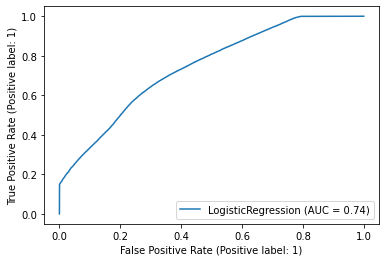

In [86]:
y_train_pred = lr2.predict(X_train_balanced)

y_train_pred_probs = lr2.predict_proba(X_train_balanced)[:,1]
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)*100
train_auc_roc = roc_auc_score(y_train_balanced, y_train_pred_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train_balanced, y_train_pred))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(y_train_balanced,y_train_pred)*100)
print("precision :",precision_score(y_train_balanced,y_train_pred))
print("recall :",recall_score(y_train_balanced,y_train_pred))
plot_roc_curve(lr2, X_train_balanced,y_train_balanced)
plt.show()

In [107]:
print("Classification Report :",classification_report(y_train_balanced,y_train_pred))

Classification Report :               precision    recall  f1-score   support

           0       0.62      0.78      0.70     64539
           1       0.71      0.53      0.61     64539

    accuracy                           0.66    129078
   macro avg       0.67      0.66      0.65    129078
weighted avg       0.67      0.66      0.65    129078



In [106]:
y_train_pred1= lr2.predict(X_train_balanced)
y_test_pred1=lr2.predict(X_test)

y_train_pred_probs1 = lr2.predict_proba(X_train_balanced)[:,1]
#y_test_pred_prob1= dtc.predict_proba(y_test)[:,1]
train_accuracy = accuracy_score(y_test, y_test_pred1)*100
#train_auc_roc = roc_auc_score(y_train_balanced, y_train_pred_probs1)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred1))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
#print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(y_test, y_test_pred1)*100)
print("precision :",precision_score(y_test, y_test_pred1))
print("recall :",recall_score(y_test, y_test_pred1))

Confusion matrix:
 [[ 4895  1487]
 [10122 11273]]
Scores on Train Data: 
Accuracy : 58.206429780033844
F1 : 66.0108329673547
precision : 0.8834639498432602
recall : 0.5268988081327413


In [108]:
print("Classification Report :",classification_report(y_test,y_test_pred1))

Classification Report :               precision    recall  f1-score   support

           0       0.33      0.77      0.46      6382
           1       0.88      0.53      0.66     21395

    accuracy                           0.58     27777
   macro avg       0.60      0.65      0.56     27777
weighted avg       0.76      0.58      0.61     27777



In [88]:
y_train_balanced.value_counts()

1    64539
0    64539
Name: Loan Status, dtype: int64

### Decision Tree calssifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier()

In [91]:
y_train_pred1= dtc.predict(X_train_balanced)
y_test_pred1=dtc.predict(X_test)

y_train_pred_probs1 = dtc.predict_proba(X_train_balanced)[:,1]
#y_test_pred_prob1= dtc.predict_proba(y_test)[:,1]
train_accuracy = accuracy_score(y_test, y_test_pred1)*100
#train_auc_roc = roc_auc_score(y_train_balanced, y_train_pred_probs1)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred1))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
#print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(y_test, y_test_pred1)*100)
print("precision :",precision_score(y_test, y_test_pred1))
print("recall :",recall_score(y_test, y_test_pred1))
#plot_roc_curve(lr2, X_train_balanced,y_train_balanced)
#plt.show()

Confusion matrix:
 [[ 5204  1178]
 [ 1306 20089]]
Scores on Train Data: 
Accuracy : 91.05734960578896
F1 : 94.17748816276782
precision : 0.944609018667419
recall : 0.9389577003972891


In [92]:
print("Classification Report :",classification_report(y_test, y_test_pred1))

Classification Report :               precision    recall  f1-score   support

           0       0.80      0.82      0.81      6382
           1       0.94      0.94      0.94     21395

    accuracy                           0.91     27777
   macro avg       0.87      0.88      0.87     27777
weighted avg       0.91      0.91      0.91     27777



### Random Forest  Classifier

In [113]:
rf=RandomForestClassifier()
rf.fit(X_train_balanced,y_train_balanced)
y_pred2=rf.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred2))
print('Area under ROC :',roc_auc_score(y_test,y_pred2))
print('F1-score: ',f1_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Accuracy score:  0.9352341865572236
Area under ROC : 0.8810468820456341
F1-score:  0.9589166228961611
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      6382
           1       0.94      0.98      0.96     21395

    accuracy                           0.94     27777
   macro avg       0.93      0.88      0.90     27777
weighted avg       0.93      0.94      0.93     27777



### Bagging Classifier

In [115]:
bag=BaggingClassifier()
bag.fit(X_train_balanced,y_train_balanced)

BaggingClassifier()

In [116]:
y_pred3=bag.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred3))
print('Area under ROC :',roc_auc_score(y_test,y_pred3))
print('F1-score: ',f1_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy score:  0.9200057601612845
Area under ROC : 0.884080613791022
F1-score:  0.9482002983961209
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6382
           1       0.95      0.95      0.95     21395

    accuracy                           0.92     27777
   macro avg       0.89      0.88      0.89     27777
weighted avg       0.92      0.92      0.92     27777



### Adaboost Classifier

In [119]:
adc=AdaBoostClassifier()
adc.fit(X_train_balanced,y_train_balanced)

AdaBoostClassifier()

In [120]:
y_pred4=adc.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred4))
print('Area under ROC :',roc_auc_score(y_test,y_pred4))
print('F1-score: ',f1_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy score:  0.914641609965079
Area under ROC : 0.8709228213933364
F1-score:  0.9449871226710597
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6382
           1       0.94      0.95      0.94     21395

    accuracy                           0.91     27777
   macro avg       0.88      0.87      0.88     27777
weighted avg       0.91      0.91      0.91     27777



### KNN Classifier

In [127]:
knn=KNeighborsClassifier()
knn.fit(X_train_balanced,y_train_balanced)

KNeighborsClassifier()

In [128]:
y_pred5=adc.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred5))
print('Area under ROC :',roc_auc_score(y_test,y_pred5))
print('F1-score: ',f1_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

Accuracy score:  0.914641609965079
Area under ROC : 0.8709228213933364
F1-score:  0.9449871226710597
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6382
           1       0.94      0.95      0.94     21395

    accuracy                           0.91     27777
   macro avg       0.88      0.87      0.88     27777
weighted avg       0.91      0.91      0.91     27777

